# Proyek Analisis Data: Nama dataset
- Nama: Wildan Fauzan Ramdana
- Email: wildanfauzan2027@gmail.com
- Id Dicoding: wildanfauzanrr

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan performa penggunaan bike sharing berdasarkan hari?
- Bagaimana performa penggunaan bike sharing berdasarkan cuaca?
- Bagaimana performa penggunaan bike sharing berdasarkan musim
?

## Menyaipkan semua library yang dibuthkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

*   `Pandas` merupakan library yang digunakan untuk melakukan analisis dan manipulasi data.
*   `numpy` merupakan library yang digunakan untuk melakukan komputasi numerik.
*   `matplotlib` merupakan library yang digunakan untuk membuat figure pada visualisasi data.
*   `seaborn` merupakan library yang digunakan untuk visualisasi data yang atraktif dan informatif.


## Data Wrangling

### Gathering Data

**Memuat tabel hour_df**

In [ ]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/anddfian/Dicoding-BADP/main/Submission/data/hour.csv")
hour_df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Memuat dan membaca dataset csv hour_df dari Github Repository

**Memuat tabel day_df**

In [ ]:
day_df = pd.read_csv("https://raw.githubusercontent.com/anddfian/Dicoding-BADP/main/Submission/data/day.csv")
day_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Memuat dan membaca dataset csv day_df dari Github Repository

### Assessing Data

**Penilaian tabel hour_df**

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Pada dataset hour_df terdapat kesalahan tipe data pada kolom dteday yaitu berupa object, untuk memperbaikinya harus diubah menjadi datetime

In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Pada tabel hour_df tidak ditemukan keanehan pada parameter statistik

In [ ]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak tedapat missing value pada dataset hour_df

In [ ]:
print(f"Jumlah duplikasi data pada hour_df  : {hour_df.duplicated().sum()}")

Jumlah duplikasi data pada hour_df  : 0


Tidak tedapat duplikasi data pada dataset hour_df

**Penilaian tabel day_df**

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Pada dataset day_df terdapat kesalahan tipe data pada kolom dteday yaitu berupa object, untuk memperbaikinya harus diubah menjadi datetime

In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Pada tabel day_df tidak ditemukan keanehan pada parameter statistik

In [ ]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak tedapat missing value pada dataset day_df

In [ ]:
print(f"Jumlah duplikasi data pada day_df : {day_df.duplicated().sum()}")

Jumlah duplikasi data pada day_df : 0


Tidak tedapat duplikasi data pada dataset day_df

### Cleaning Data

**Mengubah tipe data pada tabel hour_df**

In [ ]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Mengubah tipe data pada tabel day_df**

In [ ]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
day_df.loc[day_df["weekday"] == 0, "weekday"] = "sunday"
day_df.loc[day_df["weekday"] == 1, "weekday"] = "monday"
day_df.loc[day_df["weekday"] == 2, "weekday"] = "tuesday"
day_df.loc[day_df["weekday"] == 3, "weekday"] = "wednesday"
day_df.loc[day_df["weekday"] == 4, "weekday"] = "thursday"
day_df.loc[day_df["weekday"] == 5, "weekday"] = "friday"
day_df.loc[day_df["weekday"] == 6, "weekday"] = "saturday"

day_df.weekday.value_counts().sort_values(ascending=False)

saturday     105
sunday       105
monday       105
tuesday      104
wednesday    104
thursday     104
friday       104
Name: weekday, dtype: int64

Perhitungan jumlah pengguna bike sharing berdasarkan cuaca

In [ ]:
day_df.loc[day_df["weathersit"] == 1, "weathersit"] = "clear"
day_df.loc[day_df["weathersit"] == 2, "weathersit"] = "cloudy/mist"
day_df.loc[day_df["weathersit"] == 3, "weathersit"] = "light rain/snow"
day_df.loc[day_df["weathersit"] == 4, "weathersit"] = "heavy rain/snow"

day_df.weathersit.value_counts().sort_values(ascending=False)

clear              463
cloudy/mist        247
light rain/snow     21
Name: weathersit, dtype: int64

Perhitungan jumlah pengguna bike sharing berdasarkan musim

In [ ]:
day_df.loc[day_df["season"] == 1, "season"] = "springer"
day_df.loc[day_df["season"] == 2, "season"] = "summer"
day_df.loc[day_df["season"] == 3, "season"] = "fall"
day_df.loc[day_df["season"] == 4, "season"] = "winter"

day_df.season.value_counts().sort_values(ascending=False)

fall        188
summer      184
springer    181
winter      178
Name: season, dtype: int64

## Visualization & Explanatory Analysis

### Bagaimana perbandingan performa penggunaan bike sharing berdasarkan hari?

In [ ]:
byday_df = day_df.groupby(by="weekday").instant.nunique().reset_index()
byday_df.rename(columns={"instant": "sum"}, inplace=True)
byday_df

,weekday,sum
0,friday,104
1,monday,105
2,saturday,105
3,sunday,105
4,thursday,104
5,tuesday,104
6,wednesday,104


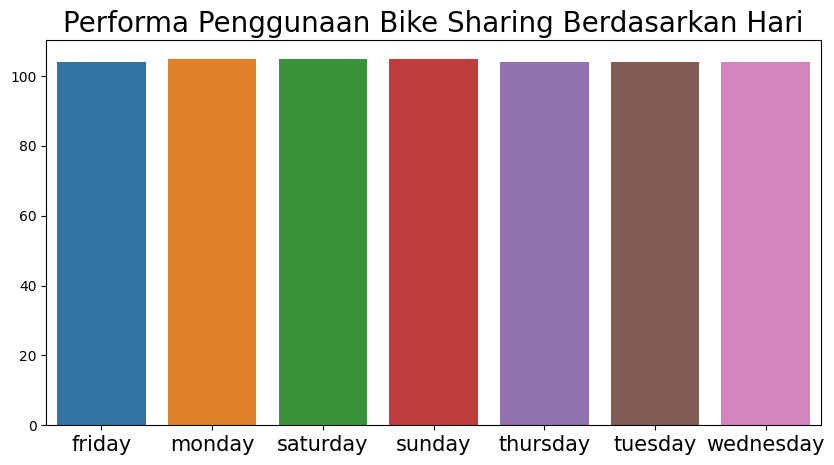

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x="weekday",
    y="sum",
    data=byday_df)
plt.xlabel(None)
plt.ylabel(None)
plt.title("Performa Penggunaan Bike Sharing Berdasarkan Hari", loc="center", fontsize=20)
plt.tick_params(axis="x", labelsize=15)
plt.show()

## Bagaimana performa penggunaan bike sharing berdasarkan cuaca?



In [ ]:
weathersit_df = day_df.groupby(by="weathersit").instant.nunique().reset_index()
weathersit_df.rename(columns={"instant": "sum"}, inplace=True)
weathersit_df

,weathersit,sum
0,clear,463
1,cloudy/mist,247
2,light rain/snow,21


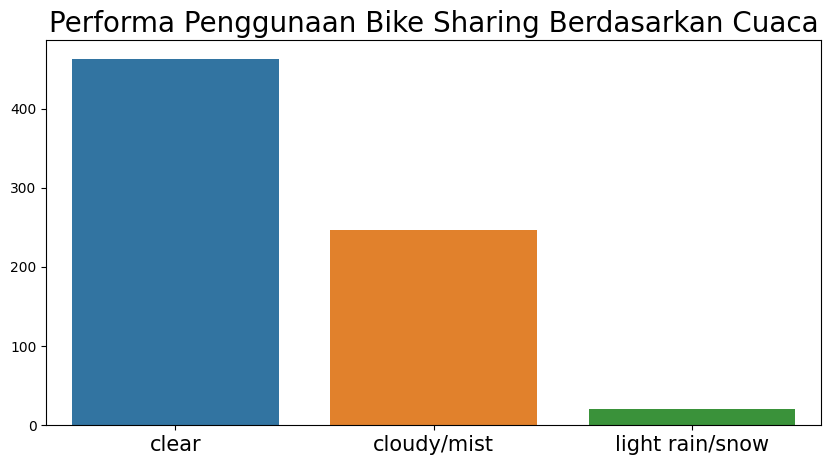

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x="weathersit",
    y="sum",
    data=weathersit_df.sort_values(by="weathersit", ascending=True))
plt.xlabel(None)
plt.ylabel(None)
plt.title("Performa Penggunaan Bike Sharing Berdasarkan Cuaca", loc="center", fontsize=20)
plt.tick_params(axis="x", labelsize=15)
plt.show()

### Bagaimana performa penggunaan bike sharing berdasarkan musim?

In [ ]:
season_df = day_df.groupby(by="season").instant.nunique().reset_index()
season_df.rename(columns={"instant": "sum"}, inplace=True)
season_df

,season,sum
0,fall,188
1,springer,181
2,summer,184
3,winter,178


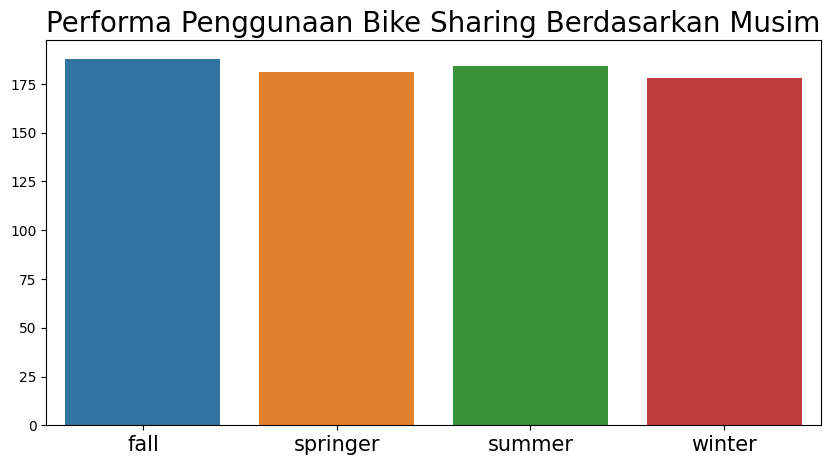

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x="season",
    y="sum",
    data=season_df.sort_values(by="season", ascending=True))
plt.xlabel(None)
plt.ylabel(None)
plt.title("Performa Penggunaan Bike Sharing Berdasarkan Musim", loc="center", fontsize=20)
plt.tick_params(axis='x', labelsize=15)
plt.show()

## Conclusion

- Berdasarkan pada hasil eksplorasi dan visualisasi data pada tabel `day_df` dapat ditarik kesimpulan jika tidak ditemukan perbedaan yang signifikan pada performa penggunaan bike sharing pada setiap harinya. Dimana penggunaan bike sharing yang paling banyak terjadi pada hari sunday, saturday dan monday (0,1,6)
- Berdasarkan pada hasil eksplorasi dan visualisasi data pada tabel `day_df` mengenai performa penggunaan bike sharing berdasarkan cuaca, didapatkan hasil jika penggunaan bike sharing terbanyak pada cuaca "Clear", sementara penggunaan bike sharing yang paling minim terjadi pada cuaca "Light Rain/Snow". Selain itu didapatkan hasil jika tidak ada penggunaan bike sharing pada cuaca "Heavy Rain/Snow".
- Tidak ada perbedaan yang signifikan pada performa penggunaan bike sharing berdasarkan musim. Untuk penggunaan bike sharing yang paling banyak terjadi pada musim "Fall", sedangkan penggunaan bike sharing yang paling minim adalah pada musim "Winter".



In [ ]:
day_df.to_csv("dashboard\day_clean.csv", index=False)